In [153]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [141]:
base_url = 'https://www.worldweatheronline.com/tehran-weather-averages/tehran/ir.aspx'
page = requests.get(base_url)
soup = BeautifulSoup(page.text, 'html.parser')

In [142]:
soup.find_all('table')

[<table class="table table-striped"><thead class="thead-dark"><tr><th scope="col">Month</th><th scope="col">Day</th><th scope="col">Night</th><th scope="col">Rain Days</th></tr></thead><tbody>
 <tr><td>January</td><td>8°c</td><td>-3°c</td><td>4</td></tr>
 <tr><td>February</td><td>10°c</td><td>-1°c</td><td>6</td></tr>
 <tr><td>March</td><td>15°c</td><td>4°c</td><td>5</td></tr>
 <tr><td>April</td><td>21°c</td><td>10°c</td><td>6</td></tr>
 <tr><td>May</td><td>28°c</td><td>16°c</td><td>4</td></tr>
 <tr><td>June</td><td>35°c</td><td>22°c</td><td>1</td></tr>
 <tr><td>July</td><td>37°c</td><td>25°c</td><td>0</td></tr>
 <tr><td>August</td><td>35°c</td><td>24°c</td><td>0</td></tr>
 <tr><td>September</td><td>31°c</td><td>19°c</td><td>0</td></tr>
 <tr><td>October</td><td>24°c</td><td>13°c</td><td>2</td></tr>
 <tr><td>November</td><td>14°c</td><td>4°c</td><td>5</td></tr>
 <tr><td>December</td><td>9°c</td><td>-1°c</td><td>4</td></tr>
 </tbody></table>,
 <table class="table">
 <thead>
 <tr>
 <th>
 <

In [143]:
table=soup.find_all('table')[0]


In [144]:
data = []
for row in table.find_all('tr'):
    cells = row.find_all(['th', 'td'])
    row_data = [cell.get_text(strip=True) for cell in cells]
    data.append(row_data)


In [145]:
df = pd.DataFrame(data[1:], columns=data[0])
#df= df.transpose()
df

,Month,Day,Night,Rain Days
0,January,8°c,-3°c,4
1,February,10°c,-1°c,6
2,March,15°c,4°c,5
3,April,21°c,10°c,6
4,May,28°c,16°c,4
5,June,35°c,22°c,1
6,July,37°c,25°c,0
7,August,35°c,24°c,0
8,September,31°c,19°c,0
9,October,24°c,13°c,2


**Data Cleaning**

In [146]:
# Set the 'A' column as the index
#df.set_index('Index', inplace=True)
#new_column_values = ['Month','avg_Temperatures', 'avg_Windspeed', 'avg_Precipitation', 'avg_Humidity','avg_Cloud_Cover','avg_Pressure','avg_Dry_Days','avg_Precip_Days', 'avg_Snow_Days','avg_Fog_Days','avg_UVIndex','avg_Hours_of_Sun']
#df=df[new_column_values]
#df.iloc[1] = df.iloc[1].str.replace(' mph','').astype(int)
#df.iloc[2] = df.iloc[2].str.replace(' in','').astype(float)
#df.iloc[5] = df.iloc[5].str.replace(' in','').astype(float)
df.rename(columns={"Day":"Day(°c)", "Night":"Night(°c)"},inplace=True)
df['Day(°c)'] = df['Day(°c)'].str.replace('°c', '').astype(int)
df['Night(°c)'] = df['Night(°c)'].str.replace('°c', '').astype(int)
df['Rain Days'] = df['Rain Days'].astype(int)


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Month      12 non-null     object
 1   Day(°c)    12 non-null     int64 
 2   Night(°c)  12 non-null     int64 
 3   Rain Days  12 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


**Data cleaning**

In [124]:

#df.iloc[3] = df.iloc[3].str.replace(' %','').astype(int)
#df.iloc[4] = df.iloc[4].str.replace(' %','').astype(int)


# Create a DataFrame with duplicated 'Name' column
#named_df = pd.DataFrame(df).reset_index(drop=True)

# Concatenate the two DataFrames along the columns axis (axis=1)
#result_df = pd.concat([named_df, split_df], axis=1)

# Reset the index
#result_df.reset_index(drop=True, inplace=True)
#result_df
#df['Hi Temperature', 'Lo Temperature'] = df[0].str.split(' ', expand=True)
#df

In [148]:
df.describe()
df

,Month,Day(°c),Night(°c),Rain Days
0,January,8,-3,4
1,February,10,-1,6
2,March,15,4,5
3,April,21,10,6
4,May,28,16,4
5,June,35,22,1
6,July,37,25,0
7,August,35,24,0
8,September,31,19,0
9,October,24,13,2


# **Explatory data analysis**

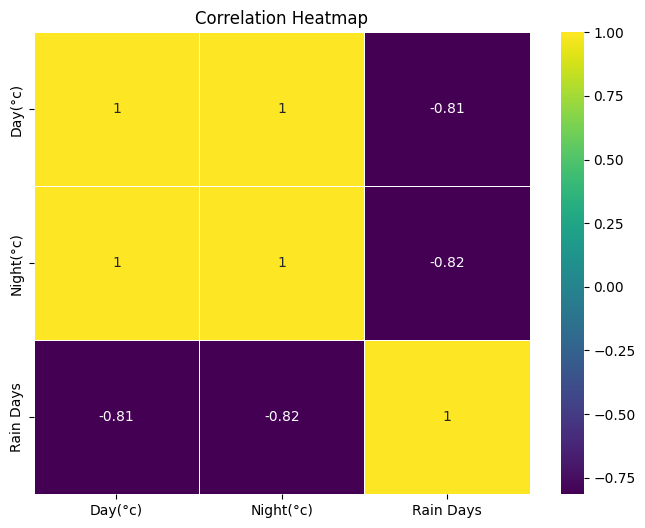

In [159]:
#df_transposed=df.transpose()
corr_matrix = df[['Day(°c)', 'Night(°c)', 'Rain Days']].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.6)
plt.title('Correlation Heatmap')
plt.show()

The correlation matrix indicates that there is a weak negative correlation between daytime and nighttime temperatures (Day(°c) and Night(°c)) in Tehran,  The number of rainy days (Rain Days) is negatively correlated with both temperature variables, suggesting that as temperatures increase, the number of rainy days tends to decrease.

Boxplot to show temperature distribution (Day vs. Night)

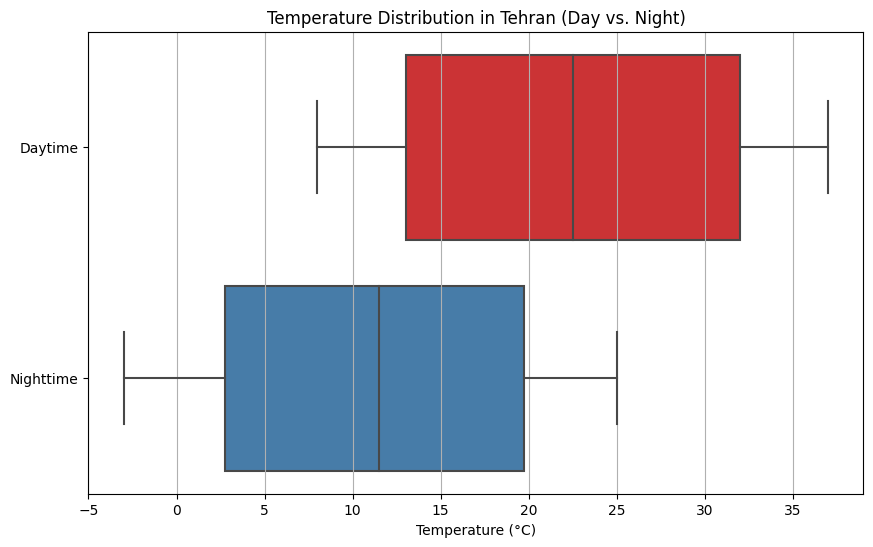

In [162]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Day(°c)', 'Night(°c)']], orient='h', palette='Set1')
plt.title('Temperature Distribution in Tehran (Day vs. Night)')
plt.xlabel('Temperature (°C)')
plt.yticks([0, 1], ['Daytime', 'Nighttime'])
plt.grid(axis='x')
plt.show()

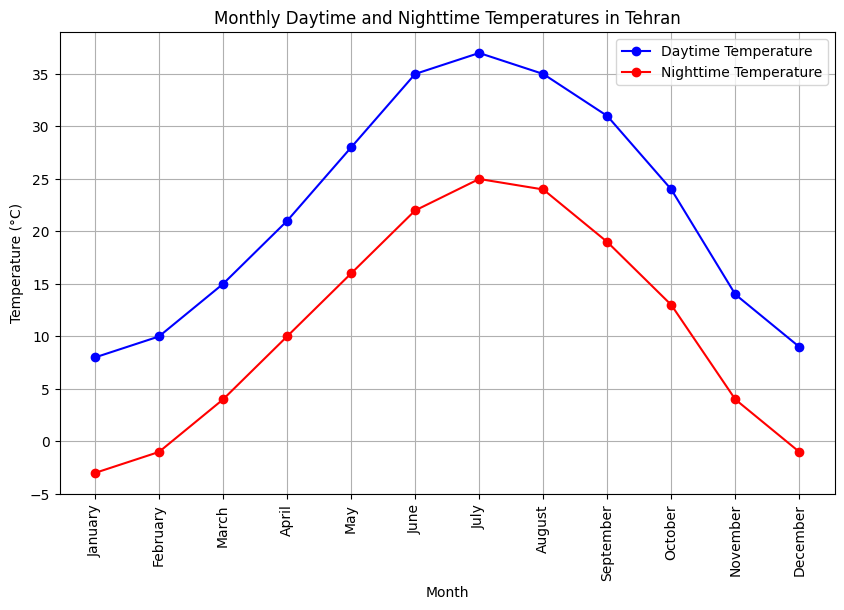

In [151]:
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Day(°c)'], label='Daytime Temperature', marker='o', linestyle='-', color='b')
plt.plot(df['Month'], df['Night(°c)'], label='Nighttime Temperature', marker='o', linestyle='-', color='r')

plt.title('Monthly Daytime and Nighttime Temperatures in Tehran')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

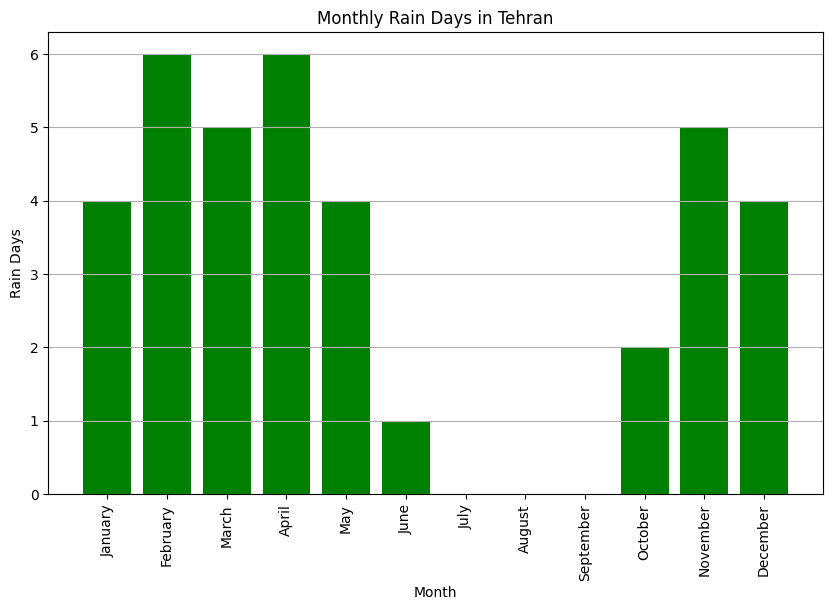

In [152]:
plt.figure(figsize=(10, 6))
plt.bar(df['Month'], df['Rain Days'], color='g')

plt.title('Monthly Rain Days in Tehran')
plt.xlabel('Month')
plt.ylabel('Rain Days')
plt.xticks(rotation='vertical')
plt.grid(axis='y')
plt.show()

##Data Export

In [ ]:
df.to_csv('tehran_weather_averages.csv', index=False)

## Conclusion
This analysis explores the historical weather data for Tehran, including average daytime and nighttime temperatures, as well as the number of rainy days for each month. The analysis includes data scraping, data cleaning, data visualization, and statistical summaries. Key findings and visualizations are presented to help understand Tehran's weather patterns throughout the year.

Additionally, based on the annual weather average, it is evident that the rainy days doesn't have correlation with the Temperature. The months July, August and September are the hottest months without rains. In addition,the average rainy days are 3 days per month which is very low. During the mentioned months, temperatures are so high, with an average around 35°C.